In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

url = "https://raw.githubusercontent.com/JayantGoel001/Heart-Disease-Classification/master/heart.csv"



# cargar el conjunto de datos
dataset = pd.read_csv(url)
dataset.head(4)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

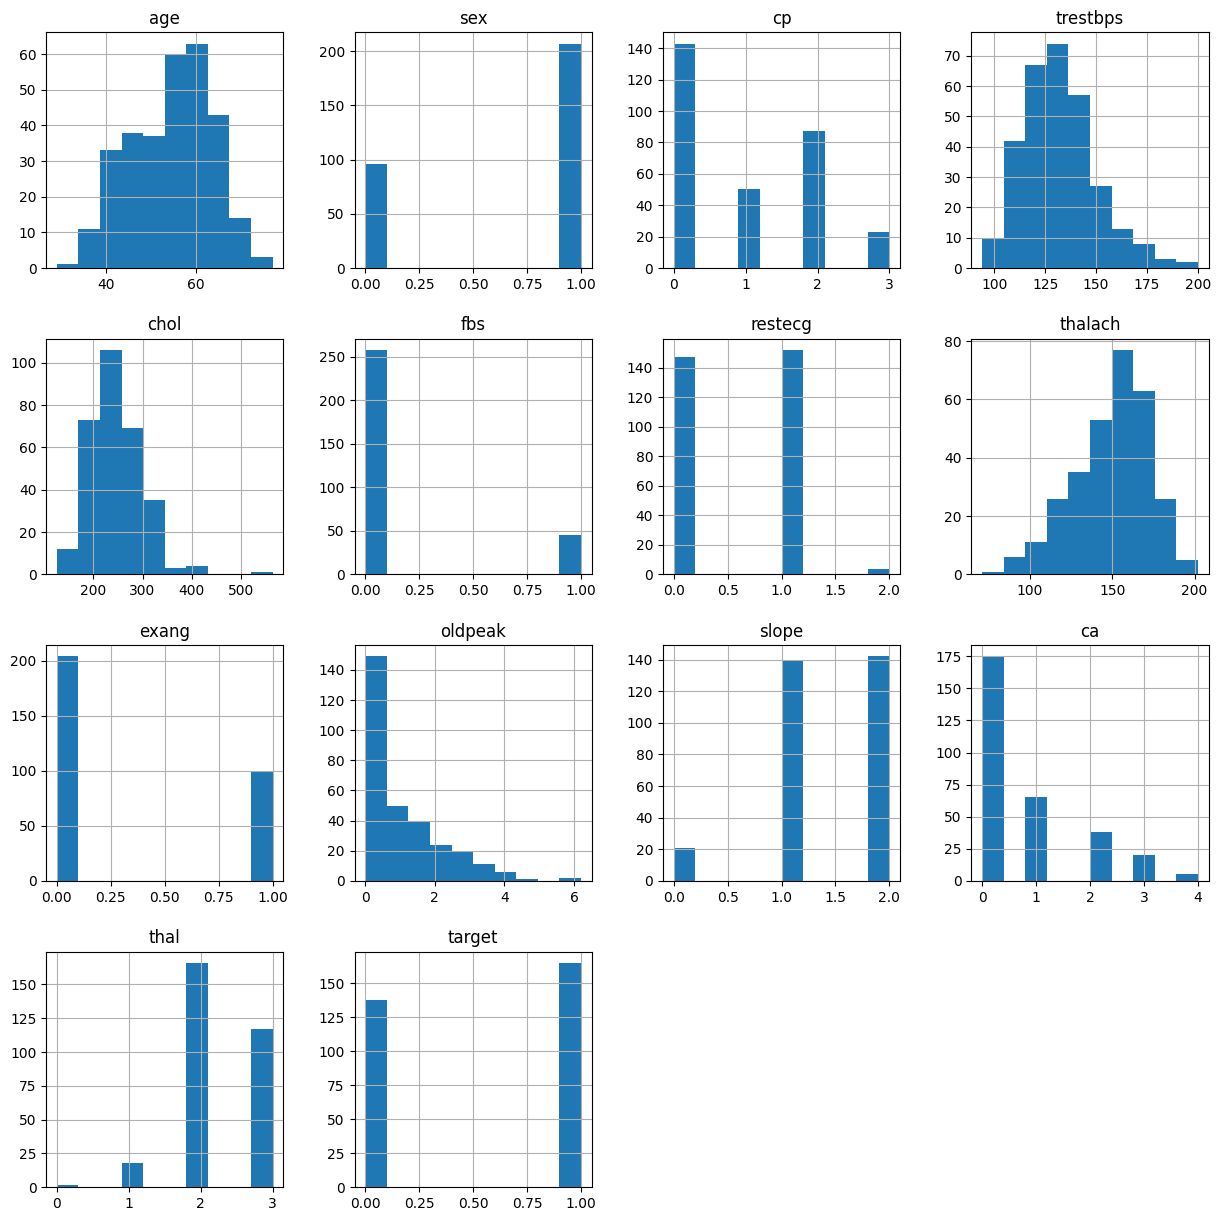

In [2]:
dataset.hist(figsize=(15,15))

In [3]:
def normalizar(x, xmax, xmin, ymax, ymin):
  m = (ymax - ymin) / (xmax - xmin)
  b = ymin - m*xmin

  y = m*x+b

  return y

In [4]:
max = np.max(dataset).values
min = np.min(dataset).values
data = normalizar(dataset,max,min,1,0)
data.head(5)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [5]:
# Split the data into features and labels
X = data.drop('target', axis=1)
y = data['target']

In [6]:
X.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667


In [7]:
y.head(4)

0    1.0
1    1.0
2    1.0
3    1.0
Name: target, dtype: float64

Seed

In [8]:
torch.manual_seed(42)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3)
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)


input_shape=(X_train.shape[1])
print(input_shape)

13


In [10]:

# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_shape, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 2)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.softmax(self.fc3(x), dim=1)
        return x

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Entrenar el modelo
num_epochs = 200
batch_size = 100
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    for i in range(0, X_train.shape[0], batch_size):
        # Obtener un batch de datos de entrenamiento y convertirlos a tensores de PyTorch
        inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
        targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)

        # Reinicializar los gradientes del optimizador y calcular los logits
        optimizer.zero_grad()
        outputs = model(inputs)

        # Calcular la pérdida y los gradientes
        loss = criterion(outputs, targets)
        loss.backward()

        # Actualizar los parámetros del modelo
        optimizer.step()

    # Calcular las pérdidas de entrenamiento y prueba al final de cada época
    train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
    train_losses.append(train_loss.item())

    test_loss = criterion(model(torch.tensor(X_test, dtype=torch.float32)), torch.tensor(y_test, dtype=torch.long))
    test_losses.append(test_loss.item())

    # Calcular la precisión de entrenamiento y prueba al final de cada época
    train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    test_pred = torch.argmax(model(torch.tensor(X_test, dtype=torch.float32)), dim=1)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

    # Imprimir las pérdidas de entrenamiento y prueba y accuracies al final de cada época
    print(f"Epoch {epoch+1}, train loss: {train_loss:.4f}, test loss: {test_loss:.4f}, train accuracy: {train_accuracy:.4f}, test accuracy: {test_accuracy:.4f}")

<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-10-3da8696f4d9d>:52: UserWarning: 

Epoch 1, train loss: 0.7027, test loss: 0.7091, train accuracy: 0.4717, test accuracy: 0.4176
Epoch 2, train loss: 0.7015, test loss: 0.7075, train accuracy: 0.4717, test accuracy: 0.4176
Epoch 3, train loss: 0.7004, test loss: 0.7062, train accuracy: 0.4717, test accuracy: 0.4176
Epoch 4, train loss: 0.6995, test loss: 0.7049, train accuracy: 0.4717, test accuracy: 0.4176
Epoch 5, train loss: 0.6987, test loss: 0.7039, train accuracy: 0.4717, test accuracy: 0.4176
Epoch 6, train loss: 0.6980, test loss: 0.7029, train accuracy: 0.4717, test accuracy: 0.4176
Epoch 7, train loss: 0.6973, test loss: 0.7019, train accuracy: 0.4717, test accuracy: 0.4176
Epoch 8, train loss: 0.6966, test loss: 0.7010, train accuracy: 0.4717, test accuracy: 0.4176
Epoch 9, train loss: 0.6960, test loss: 0.7001, train accuracy: 0.4717, test accuracy: 0.4176
Epoch 10, train loss: 0.6953, test loss: 0.6991, train accuracy: 0.4717, test accuracy: 0.4286
Epoch 11, train loss: 0.6946, test loss: 0.6982, train accu

<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-10-3da8696f4d9d>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>

Epoch 12, train loss: 0.6938, test loss: 0.6972, train accuracy: 0.4811, test accuracy: 0.4286
Epoch 13, train loss: 0.6930, test loss: 0.6961, train accuracy: 0.4906, test accuracy: 0.4286


<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-10-3da8696f4d9d>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>

Epoch 14, train loss: 0.6922, test loss: 0.6951, train accuracy: 0.5142, test accuracy: 0.4396
Epoch 15, train loss: 0.6912, test loss: 0.6939, train accuracy: 0.5425, test accuracy: 0.4835
Epoch 16, train loss: 0.6903, test loss: 0.6927, train accuracy: 0.5849, test accuracy: 0.4945
Epoch 17, train loss: 0.6892, test loss: 0.6915, train accuracy: 0.5849, test accuracy: 0.5604
Epoch 18, train loss: 0.6881, test loss: 0.6902, train accuracy: 0.5896, test accuracy: 0.5385
Epoch 19, train loss: 0.6869, test loss: 0.6888, train accuracy: 0.5660, test accuracy: 0.6044
Epoch 20, train loss: 0.6857, test loss: 0.6873, train accuracy: 0.5991, test accuracy: 0.6484
Epoch 21, train loss: 0.6844, test loss: 0.6857, train accuracy: 0.6179, test accuracy: 0.6923
Epoch 22, train loss: 0.6830, test loss: 0.6841, train accuracy: 0.6509, test accuracy: 0.7363
Epoch 23, train loss: 0.6816, test loss: 0.6824, train accuracy: 0.6698, test accuracy: 0.7692
Epoch 24, train loss: 0.6801, test loss: 0.6806, t

<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-10-3da8696f4d9d>:52: UserWarning: 

Epoch 36, train loss: 0.6538, test loss: 0.6506, train accuracy: 0.7406, test accuracy: 0.7692
Epoch 37, train loss: 0.6506, test loss: 0.6470, train accuracy: 0.7406, test accuracy: 0.7692
Epoch 38, train loss: 0.6474, test loss: 0.6433, train accuracy: 0.7547, test accuracy: 0.7912
Epoch 39, train loss: 0.6440, test loss: 0.6395, train accuracy: 0.7594, test accuracy: 0.7912
Epoch 40, train loss: 0.6405, test loss: 0.6355, train accuracy: 0.7642, test accuracy: 0.7912


<ipython-input-10-3da8696f4d9d>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor

Epoch 41, train loss: 0.6370, test loss: 0.6313, train accuracy: 0.7594, test accuracy: 0.7912
Epoch 42, train loss: 0.6334, test loss: 0.6272, train accuracy: 0.7689, test accuracy: 0.8022
Epoch 43, train loss: 0.6298, test loss: 0.6231, train accuracy: 0.7736, test accuracy: 0.8022
Epoch 44, train loss: 0.6261, test loss: 0.6189, train accuracy: 0.7736, test accuracy: 0.8132
Epoch 45, train loss: 0.6224, test loss: 0.6147, train accuracy: 0.7689, test accuracy: 0.8132
Epoch 46, train loss: 0.6186, test loss: 0.6104, train accuracy: 0.7783, test accuracy: 0.8132
Epoch 47, train loss: 0.6148, test loss: 0.6062, train accuracy: 0.7783, test accuracy: 0.8022
Epoch 48, train loss: 0.6111, test loss: 0.6020, train accuracy: 0.7783, test accuracy: 0.8022
Epoch 49, train loss: 0.6074, test loss: 0.5979, train accuracy: 0.7783, test accuracy: 0.8022
Epoch 50, train loss: 0.6037, test loss: 0.5938, train accuracy: 0.7783, test accuracy: 0.8022
Epoch 51, train loss: 0.6001, test loss: 0.5899, t

<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-10-3da8696f4d9d>:52: UserWarning: 

Epoch 59, train loss: 0.5733, test loss: 0.5627, train accuracy: 0.7830, test accuracy: 0.8132
Epoch 60, train loss: 0.5703, test loss: 0.5598, train accuracy: 0.7830, test accuracy: 0.8242
Epoch 61, train loss: 0.5674, test loss: 0.5569, train accuracy: 0.7877, test accuracy: 0.8242
Epoch 62, train loss: 0.5646, test loss: 0.5542, train accuracy: 0.7925, test accuracy: 0.8242
Epoch 63, train loss: 0.5619, test loss: 0.5515, train accuracy: 0.7925, test accuracy: 0.8242


<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-10-3da8696f4d9d>:52: UserWarning: 

Epoch 64, train loss: 0.5593, test loss: 0.5490, train accuracy: 0.7925, test accuracy: 0.8242
Epoch 65, train loss: 0.5568, test loss: 0.5466, train accuracy: 0.7925, test accuracy: 0.8352
Epoch 66, train loss: 0.5543, test loss: 0.5444, train accuracy: 0.7972, test accuracy: 0.8352
Epoch 67, train loss: 0.5520, test loss: 0.5422, train accuracy: 0.7972, test accuracy: 0.8352
Epoch 68, train loss: 0.5497, test loss: 0.5400, train accuracy: 0.7972, test accuracy: 0.8352
Epoch 69, train loss: 0.5474, test loss: 0.5380, train accuracy: 0.8019, test accuracy: 0.8352
Epoch 70, train loss: 0.5452, test loss: 0.5360, train accuracy: 0.8019, test accuracy: 0.8352
Epoch 71, train loss: 0.5431, test loss: 0.5341, train accuracy: 0.8066, test accuracy: 0.8352
Epoch 72, train loss: 0.5410, test loss: 0.5323, train accuracy: 0.8066, test accuracy: 0.8352
Epoch 73, train loss: 0.5390, test loss: 0.5305, train accuracy: 0.8066, test accuracy: 0.8352
Epoch 74, train loss: 0.5371, test loss: 0.5289, t

<ipython-input-10-3da8696f4d9d>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor

Epoch 87, train loss: 0.5183, test loss: 0.5125, train accuracy: 0.8113, test accuracy: 0.8242
Epoch 88, train loss: 0.5172, test loss: 0.5116, train accuracy: 0.8113, test accuracy: 0.8242
Epoch 89, train loss: 0.5162, test loss: 0.5107, train accuracy: 0.8160, test accuracy: 0.8242
Epoch 90, train loss: 0.5151, test loss: 0.5098, train accuracy: 0.8160, test accuracy: 0.8132

<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-10-3da8696f4d9d>:52: UserWarning: 


Epoch 91, train loss: 0.5141, test loss: 0.5089, train accuracy: 0.8160, test accuracy: 0.8132
Epoch 92, train loss: 0.5131, test loss: 0.5081, train accuracy: 0.8160, test accuracy: 0.8132
Epoch 93, train loss: 0.5122, test loss: 0.5073, train accuracy: 0.8160, test accuracy: 0.8132
Epoch 94, train loss: 0.5113, test loss: 0.5065, train accuracy: 0.8160, test accuracy: 0.8132
Epoch 95, train loss: 0.5104, test loss: 0.5057, train accuracy: 0.8208, test accuracy: 0.8132
Epoch 96, train loss: 0.5095, test loss: 0.5050, train accuracy: 0.8208, test accuracy: 0.8132
Epoch 97, train loss: 0.5087, test loss: 0.5043, train accuracy: 0.8208, test accuracy: 0.8132
Epoch 98, train loss: 0.5078, test loss: 0.5036, train accuracy: 0.8255, test accuracy: 0.8132
Epoch 99, train loss: 0.5070, test loss: 0.5030, train accuracy: 0.8208, test accuracy: 0.8132
Epoch 100, train loss: 0.5062, test loss: 0.5023, train accuracy: 0.8208, test accuracy: 0.8132
Epoch 101, train loss: 0.5055, test loss: 0.5017

<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-10-3da8696f4d9d>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>

Epoch 109, train loss: 0.5001, test loss: 0.4973, train accuracy: 0.8255, test accuracy: 0.8132
Epoch 110, train loss: 0.4995, test loss: 0.4968, train accuracy: 0.8208, test accuracy: 0.8132
Epoch 111, train loss: 0.4989, test loss: 0.4963, train accuracy: 0.8208, test accuracy: 0.8132


<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-10-3da8696f4d9d>:52: UserWarning: 

Epoch 112, train loss: 0.4983, test loss: 0.4958, train accuracy: 0.8208, test accuracy: 0.8132
Epoch 113, train loss: 0.4977, test loss: 0.4953, train accuracy: 0.8208, test accuracy: 0.8132
Epoch 114, train loss: 0.4971, test loss: 0.4949, train accuracy: 0.8208, test accuracy: 0.8132
Epoch 115, train loss: 0.4965, test loss: 0.4944, train accuracy: 0.8208, test accuracy: 0.8132
Epoch 116, train loss: 0.4960, test loss: 0.4940, train accuracy: 0.8208, test accuracy: 0.8132
Epoch 117, train loss: 0.4954, test loss: 0.4935, train accuracy: 0.8208, test accuracy: 0.8132
Epoch 118, train loss: 0.4949, test loss: 0.4931, train accuracy: 0.8208, test accuracy: 0.8132
Epoch 119, train loss: 0.4944, test loss: 0.4927, train accuracy: 0.8208, test accuracy: 0.8132
Epoch 120, train loss: 0.4938, test loss: 0.4923, train accuracy: 0.8208, test accuracy: 0.8132
Epoch 121, train loss: 0.4933, test loss: 0.4919, train accuracy: 0.8208, test accuracy: 0.8132
Epoch 122, train loss: 0.4928, test loss

<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-10-3da8696f4d9d>:52: UserWarning: 

Epoch 134, train loss: 0.4874, test loss: 0.4871, train accuracy: 0.8302, test accuracy: 0.8132
Epoch 135, train loss: 0.4870, test loss: 0.4868, train accuracy: 0.8302, test accuracy: 0.8132


<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-10-3da8696f4d9d>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>

Epoch 136, train loss: 0.4866, test loss: 0.4864, train accuracy: 0.8302, test accuracy: 0.8132
Epoch 137, train loss: 0.4862, test loss: 0.4861, train accuracy: 0.8302, test accuracy: 0.8132
Epoch 138, train loss: 0.4858, test loss: 0.4858, train accuracy: 0.8302, test accuracy: 0.8132
Epoch 139, train loss: 0.4854, test loss: 0.4855, train accuracy: 0.8302, test accuracy: 0.8132
Epoch 140, train loss: 0.4850, test loss: 0.4852, train accuracy: 0.8302, test accuracy: 0.8132
Epoch 141, train loss: 0.4846, test loss: 0.4849, train accuracy: 0.8302, test accuracy: 0.8132
Epoch 142, train loss: 0.4842, test loss: 0.4846, train accuracy: 0.8302, test accuracy: 0.8132
Epoch 143, train loss: 0.4838, test loss: 0.4843, train accuracy: 0.8302, test accuracy: 0.8132
Epoch 144, train loss: 0.4835, test loss: 0.4840, train accuracy: 0.8302, test accuracy: 0.8132
Epoch 145, train loss: 0.4831, test loss: 0.4837, train accuracy: 0.8302, test accuracy: 0.8242
Epoch 146, train loss: 0.4828, test loss

<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-10-3da8696f4d9d>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>

Epoch 152, train loss: 0.4808, test loss: 0.4818, train accuracy: 0.8396, test accuracy: 0.8242
Epoch 153, train loss: 0.4805, test loss: 0.4816, train accuracy: 0.8396, test accuracy: 0.8242


<ipython-input-10-3da8696f4d9d>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor

Epoch 154, train loss: 0.4801, test loss: 0.4813, train accuracy: 0.8396, test accuracy: 0.8352
Epoch 155, train loss: 0.4798, test loss: 0.4811, train accuracy: 0.8396, test accuracy: 0.8352
Epoch 156, train loss: 0.4795, test loss: 0.4809, train accuracy: 0.8396, test accuracy: 0.8352
Epoch 157, train loss: 0.4792, test loss: 0.4806, train accuracy: 0.8396, test accuracy: 0.8352
Epoch 158, train loss: 0.4789, test loss: 0.4804, train accuracy: 0.8396, test accuracy: 0.8352
Epoch 159, train loss: 0.4786, test loss: 0.4802, train accuracy: 0.8396, test accuracy: 0.8352
Epoch 160, train loss: 0.4783, test loss: 0.4799, train accuracy: 0.8396, test accuracy: 0.8462
Epoch 161, train loss: 0.4781, test loss: 0.4797, train accuracy: 0.8396, test accuracy: 0.8462
Epoch 162, train loss: 0.4778, test loss: 0.4795, train accuracy: 0.8396, test accuracy: 0.8462
Epoch 163, train loss: 0.4775, test loss: 0.4793, train accuracy: 0.8396, test accuracy: 0.8462
Epoch 164, train loss: 0.4772, test loss

<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-10-3da8696f4d9d>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>

Epoch 168, train loss: 0.4761, test loss: 0.4783, train accuracy: 0.8396, test accuracy: 0.8462
Epoch 169, train loss: 0.4759, test loss: 0.4781, train accuracy: 0.8396, test accuracy: 0.8462
Epoch 170, train loss: 0.4756, test loss: 0.4779, train accuracy: 0.8396, test accuracy: 0.8462
Epoch 171, train loss: 0.4754, test loss: 0.4778, train accuracy: 0.8443, test accuracy: 0.8462
Epoch 172, train loss: 0.4751, test loss: 0.4776, train accuracy: 0.8443, test accuracy: 0.8462


<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-10-3da8696f4d9d>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>

Epoch 173, train loss: 0.4749, test loss: 0.4774, train accuracy: 0.8443, test accuracy: 0.8462
Epoch 174, train loss: 0.4746, test loss: 0.4772, train accuracy: 0.8443, test accuracy: 0.8462
Epoch 175, train loss: 0.4744, test loss: 0.4771, train accuracy: 0.8443, test accuracy: 0.8462
Epoch 176, train loss: 0.4742, test loss: 0.4769, train accuracy: 0.8443, test accuracy: 0.8462
Epoch 177, train loss: 0.4739, test loss: 0.4767, train accuracy: 0.8443, test accuracy: 0.8462
Epoch 178, train loss: 0.4737, test loss: 0.4766, train accuracy: 0.8443, test accuracy: 0.8462
Epoch 179, train loss: 0.4735, test loss: 0.4764, train accuracy: 0.8443, test accuracy: 0.8462
Epoch 180, train loss: 0.4732, test loss: 0.4763, train accuracy: 0.8443, test accuracy: 0.8462
Epoch 181, train loss: 0.4730, test loss: 0.4761, train accuracy: 0.8443, test accuracy: 0.8462
Epoch 182, train loss: 0.4728, test loss: 0.4760, train accuracy: 0.8443, test accuracy: 0.8462
Epoch 183, train loss: 0.4726, test loss

<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-10-3da8696f4d9d>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_pred = torch.argmax(model(torch.tensor(X_train, dtype=torch.float32)), dim=1)
<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>


Epoch 194, train loss: 0.4703, test loss: 0.4743, train accuracy: 0.8443, test accuracy: 0.8462
Epoch 195, train loss: 0.4702, test loss: 0.4742, train accuracy: 0.8443, test accuracy: 0.8462
Epoch 196, train loss: 0.4700, test loss: 0.4740, train accuracy: 0.8443, test accuracy: 0.8462
Epoch 197, train loss: 0.4698, test loss: 0.4739, train accuracy: 0.8443, test accuracy: 0.8462
Epoch 198, train loss: 0.4696, test loss: 0.4738, train accuracy: 0.8443, test accuracy: 0.8462
Epoch 199, train loss: 0.4694, test loss: 0.4737, train accuracy: 0.8443, test accuracy: 0.8571
Epoch 200, train loss: 0.4693, test loss: 0.4736, train accuracy: 0.8443, test accuracy: 0.8571


<ipython-input-10-3da8696f4d9d>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-10-3da8696f4d9d>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)
<ipython-input-10-3da8696f4d9d>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.long))
<ipython-input-10-3da8696f4d9d>:52: UserWarning: 

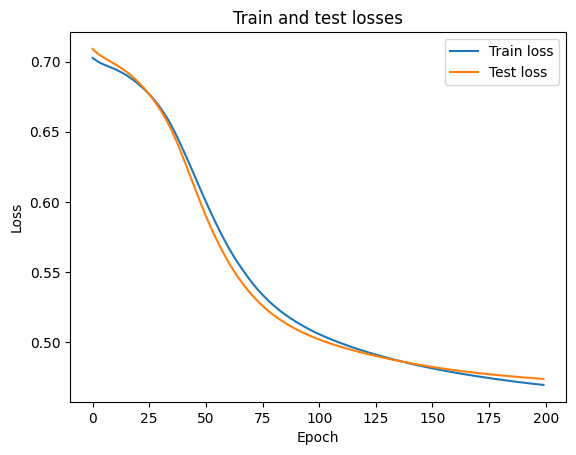

In [11]:
import matplotlib.pyplot as plt

# Visualizar train y test loss
plt.figure()
plt.plot(train_losses, label='Train loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.title('Train and test losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



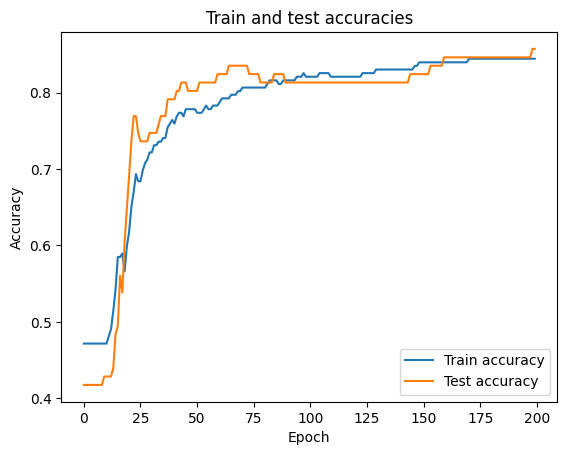

In [12]:
# Visualizar train y test accuracy
plt.figure()
plt.plot(train_accuracies, label='Train accuracy')
plt.plot(test_accuracies, label='Test accuracy')
plt.legend()
plt.title('Train and test accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

form 1 to make the matrix

<ipython-input-13-84c0eb674725>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_pred = model(torch.tensor(X_train, dtype=torch.float32)).detach().numpy().argmax(axis=1)


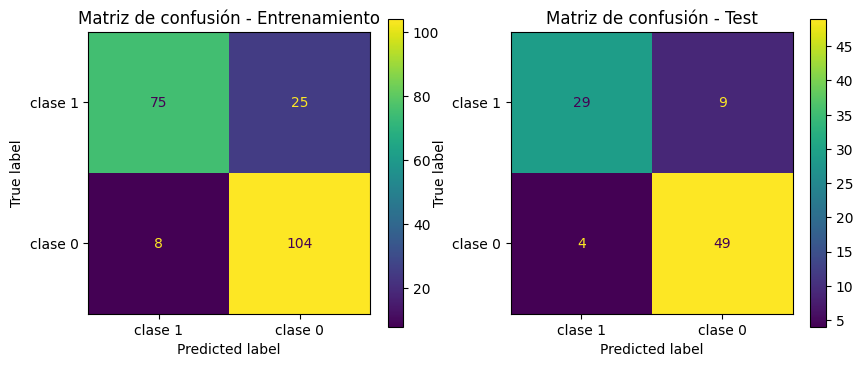

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predecir clases para datos de entrenamiento y test
y_train_pred = model(torch.tensor(X_train, dtype=torch.float32)).detach().numpy().argmax(axis=1)
y_test_pred = model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy().argmax(axis=1)

# calcular matrices de confusión
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# mostrar matrices de confusión
train_disp = ConfusionMatrixDisplay(train_cm, display_labels=['clase 1', 'clase 0'])
test_disp = ConfusionMatrixDisplay(test_cm, display_labels=['clase 1', 'clase 0'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
train_disp.plot(ax=ax1)
ax1.set(title='Matriz de confusión - Entrenamiento')
test_disp.plot(ax=ax2)
ax2.set(title='Matriz de confusión - Test')
plt.show()


form 2 to make the matrix

confusion matrix:
[[29  9]
 [ 4 49]]


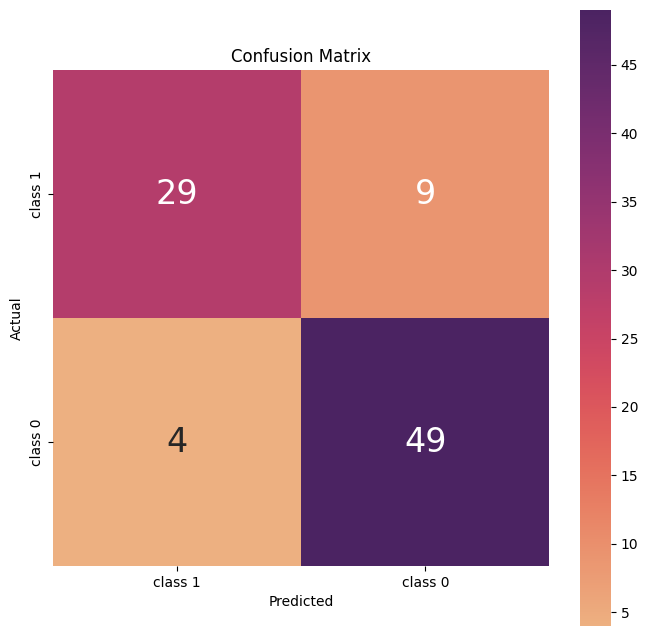

In [14]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Obtener las predicciones para el conjunto de prueba
y_pred = model(torch.tensor(X_test, dtype=torch.float32))
_, predicted = torch.max(y_pred, 1)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, predicted.numpy())
print("confusion matrix:", cm, sep="\n")

# Dibujar la matriz de confusión utilizando seaborn
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['class 1', 'class 0'],
                 yticklabels=['class 1', 'class 0'],
                 fmt='g', cmap='flare', annot_kws={"size": 24})
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
plt.show()
